In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tqdm import tqdm
import os

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

import transformers

import librosa
import librosa.display
import IPython.display as ipd

In [4]:
targets_path = 'dataset/train.csv'
audio_files_path = 'dataset/train_mp3s'

## Audio Data preprocess

In [17]:
with open(targets_path, encoding='utf-8') as f:
            targets = pd.read_csv(f)
            targets = targets[targets.split == 'train']

In [15]:
np.unique(targets.split)

array(['train', 'valid'], dtype=object)

In [28]:
targets.sentence[targets.id == '0005f554afd8'].item()

'ব্যবহারকারীর কাছে অপারেটিং সিস্টেমের সবচেয়ে দৃশ্যমান রূপ হল কম্পিউটারের ব্যবহারকারী ইন্টারফেস।'

In [1]:
audio_file_path = 'dataset/train_mp3s/0005f554afd8.mp3'

In [27]:
ipd.Audio(audio_file_path)

In [31]:
y, sr = librosa.load(audio_file_path)

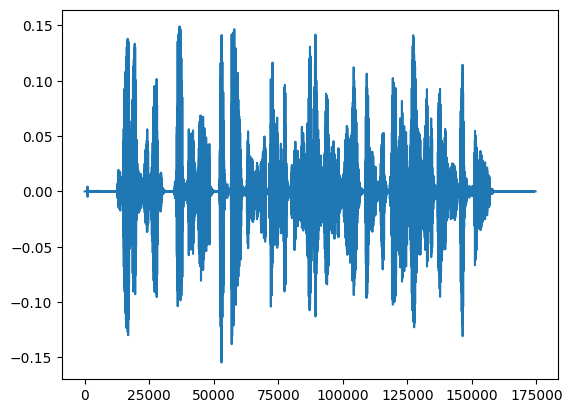

In [36]:
plt.plot(y)

In [73]:
y_trimmed, _ = librosa.effects.trim(y, top_db=40)

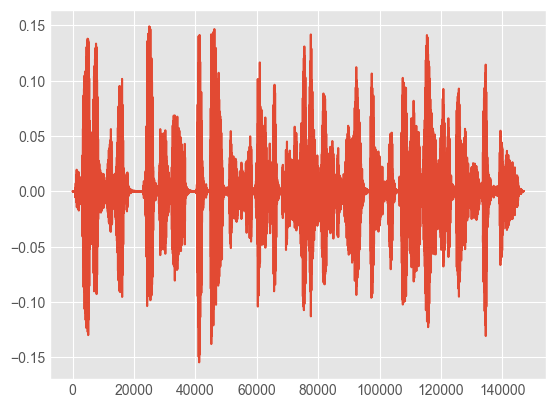

In [72]:
plt.plot(y_trimmed)
plt.show()

In [74]:
spectr = librosa.stft(y)

In [75]:
S_db = librosa.amplitude_to_db(np.abs(spectr), ref=np.max)

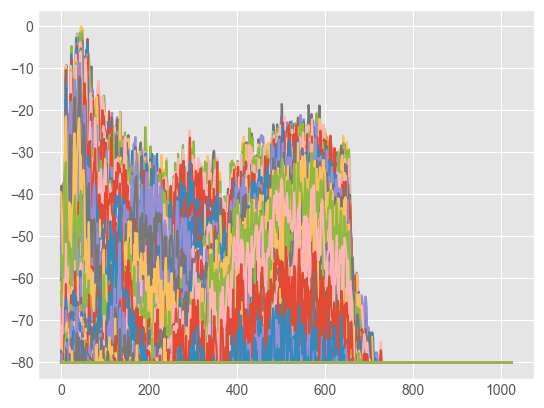

In [76]:
plt.plot(S_db)
plt.show()

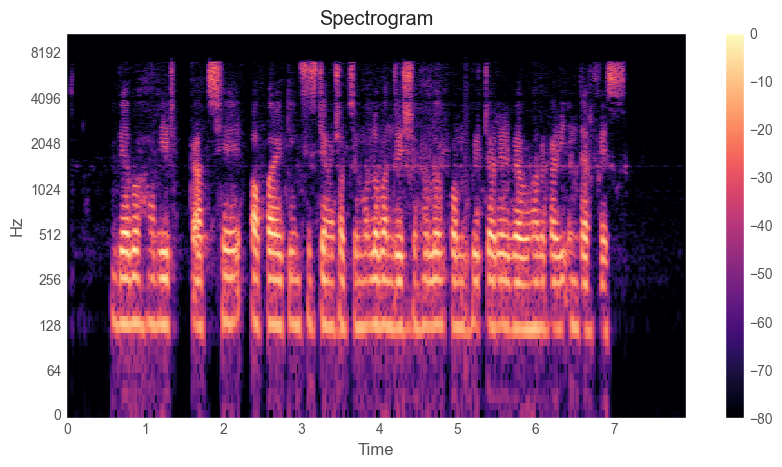

In [77]:
fig, ax = plt.subplots(figsize=(10,5), )

img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax,
                               )
ax.set_title('Spectrogram')

fig.colorbar(img, ax=ax)
plt.show()

In [84]:
mel_spectr = librosa.feature.melspectrogram(y=y_trimmed, sr=sr, n_mels=256)

mel_db = librosa.amplitude_to_db(mel_spectr, ref=np.max)

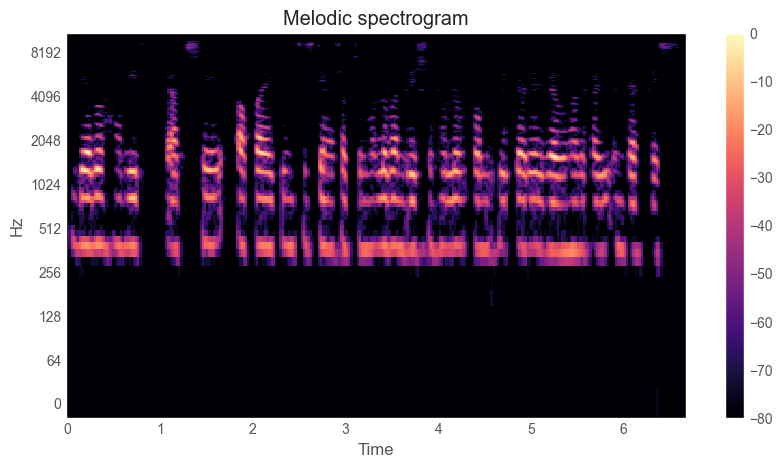

In [85]:
plt.show()
fig, ax = plt.subplots(figsize=(10, 5), )

img = librosa.display.specshow(mel_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax,
                               )
ax.set_title('Melodic spectrogram')

fig.colorbar(img, ax=ax)
plt.show()

In [ ]:
class BengaliAudioDataset(Dataset):
    def __init__(self, path_to_targets, path_to_audio, test=False):
        super(BengaliAudioDataset, self).__init__()

        self.path_to_audio = path_to_audio
        self.test = test

        with open(path_to_targets, encoding='utf-8') as f:
            self.targets = f

        @property
        def targets(self):
            return self.__targets

        @targets.setter
        def targets(self, file):
            targets_file = pd.read_csv(file)
            if self.test:
                self.__targets = targets_file[targets_file.split == 'valid']
            else:
                self.__targets = targets_file[targets_file.split == 'train']

        def __len__(self):
            return len(self.targets)

        def get_audio(self, name):
            audio_name = os.path.join(self.path_to_audio, name + '.mp3')
            audio, sr = librosa.load(audio_name)
            audio_trimmed = librosa.effects.trim(audio, top_db=40)

            return torch.tensor(audio_trimmed)

        def get_targets(self, name):
            sentence = self.targets.sentence[self.targets.id == name]
            # tokenized_sentence =

            # return torch.tensor(tokenized_sentence)

        def get_item(self, index):
            name = self.targets.id[index]
            audio_file = get_audio(name)
            sentence = get_targets(name)

            return audio_file, sentence